In [1]:
# Download libraries

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

## EDA

In [3]:
# Read the dataset

In [4]:
IRD= pd.read_csv('International_Report_Departures.csv')
IRD

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2006,2006,5,12016,GUM,5,13162,MAJ,844,20177,PFQ,1,Departures,0,10,10
1,05/01/2003,2003,5,10299,ANC,1,13856,OKO,736,20007,5Y,1,Departures,0,15,15
2,03/01/2007,2007,3,10721,BOS,13,12651,KEF,439,20402,GL,1,Departures,0,1,1
3,12/01/2004,2004,12,11259,DAL,74,16271,YYZ,936,20201,AMQ,1,Departures,0,1,1
4,05/01/2009,2009,5,13303,MIA,33,11075,CMW,219,21323,5L,0,Departures,0,20,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930803,07/01/2000,2000,7,13303,MIA,33,13605,NAS,204,20398,MQ,1,Departures,1422,0,1422
930804,04/01/2019,2019,4,13303,MIA,33,14286,PTY,162,19770,CM,0,Departures,1439,0,1439
930805,08/01/2000,2000,8,13303,MIA,33,13605,NAS,204,20398,MQ,1,Departures,1441,0,1441
930806,09/01/2004,2004,9,12266,IAH,74,15632,VSA,148,19534,AM,0,Departures,1461,0,1461


In [5]:
# Find out the number of records and the number of attributes

In [6]:
print(IRD.shape)

(930808, 16)


In [7]:
# Know the type of each attribute and how many of them are in the data set

In [8]:
IRD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930808 entries, 0 to 930807
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   data_dte      930808 non-null  object
 1   Year          930808 non-null  int64 
 2   Month         930808 non-null  int64 
 3   usg_apt_id    930808 non-null  int64 
 4   usg_apt       930808 non-null  object
 5   usg_wac       930808 non-null  int64 
 6   fg_apt_id     930808 non-null  int64 
 7   fg_apt        930808 non-null  object
 8   fg_wac        930808 non-null  int64 
 9   airlineid     930808 non-null  int64 
 10  carrier       927753 non-null  object
 11  carriergroup  930808 non-null  int64 
 12  type          930808 non-null  object
 13  Scheduled     930808 non-null  int64 
 14  Charter       930808 non-null  int64 
 15  Total         930808 non-null  int64 
dtypes: int64(11), object(5)
memory usage: 113.6+ MB


In [9]:
# We note that the data set does not contain missing values, except for an attribute carrier contains about 3055 missing values

In [10]:
IRD.isnull().sum()

data_dte           0
Year               0
Month              0
usg_apt_id         0
usg_apt            0
usg_wac            0
fg_apt_id          0
fg_apt             0
fg_wac             0
airlineid          0
carrier         3055
carriergroup       0
type               0
Scheduled          0
Charter            0
Total              0
dtype: int64

In [11]:
# Find out the number of unique values in each attribute
# We note that each attribute contains many distinct values, except for carriergroup, which contains two unique values

In [12]:
IRD.nunique()

data_dte         363
Year              31
Month             12
usg_apt_id      1015
usg_apt         1022
usg_wac           54
fg_apt_id       1666
fg_apt          1669
fg_wac           229
airlineid        705
carrier          734
carriergroup       2
type               1
Scheduled        883
Charter          255
Total            886
dtype: int64

In [13]:
# To get acquainted with the statistical description of the traits, we note that
# The most years in which there were trips were in 2006, and 0.25 of the trips were in the year 1999, and 0.75 of them were in the year 2014
# The most usg_apt_id was at gate number 12809, it was 0.25 busiest at gate number 11618, and 0.75 of it was at gate number 13487
#  The most fg_apt_id was at gate number 13484, it was 0.25 busiest at gate number 11868, and 0.75 of it was at gate number 15084
# The most airlines that operate flights that have the number 20057, and 25% of them have the number 19991, and 75% of them have the number
# More carriergroup tracking of domestic airlines for US states

In [14]:
IRD.describe().round(1).T

,count,mean,std,min,25%,50%,75%,max
Year,930808.0,2006.0,8.6,1990.0,1999.0,2007.0,2014.0,2020.0
Month,930808.0,6.4,3.5,1.0,3.0,6.0,9.0,12.0
usg_apt_id,930808.0,12809.5,2716.2,10010.0,11618.0,12892.0,13487.0,99999.0
usg_wac,930808.0,42.5,27.6,1.0,22.0,33.0,72.0,93.0
fg_apt_id,930808.0,13484.7,1932.6,10119.0,11868.0,13408.0,15084.0,16881.0
fg_wac,930808.0,466.9,288.0,106.0,205.0,427.0,736.0,975.0
airlineid,930808.0,20057.2,479.1,19386.0,19704.0,19991.0,20312.0,22067.0
carriergroup,930808.0,0.6,0.5,0.0,0.0,1.0,1.0,1.0
Scheduled,930808.0,40.0,60.9,0.0,0.0,17.0,60.0,2019.0
Charter,930808.0,2.0,8.3,0.0,0.0,0.0,1.0,1092.0


In [15]:
#The specialized description of the categorical data,,, 
# the most data_dte was 03/01/2018 with 3471 flights
# The most used usg_apt was a gateway with the MIA code 133820
# The most used fg_apt was the foreign gateway with the code YYZ number 50044
# The most used carrier was the international code AA for a company with the number 61794


In [16]:
IRD.describe(include=["object", "bool"]).T

,count,unique,top,freq
data_dte,930808,363,03/01/2018,3471
usg_apt,930808,1022,MIA,133820
fg_apt,930808,1669,YYZ,50044
carrier,927753,734,AA,58739
type,930808,1,Departures,930808


In [17]:
IRD.groupby(['carriergroup'])['airlineid'].count()

carriergroup
0    372918
1    557890
Name: airlineid, dtype: int64

In [18]:
IRD.groupby(['Year','Month'])['usg_apt'].count()

Year  Month
1990  1        1751
      2        1774
      3        1775
      4        1689
      5        1619
               ... 
2019  11       3126
      12       3209
2020  1        3268
      2        3197
      3        3185
Name: usg_apt, Length: 363, dtype: int64

In [19]:
# We note the frequency distribution for each attribute, some attributes such as Year, Month, usg_wac fg_apt_id, fg_wac are semi-normal, and the other attributes are either left or right biased

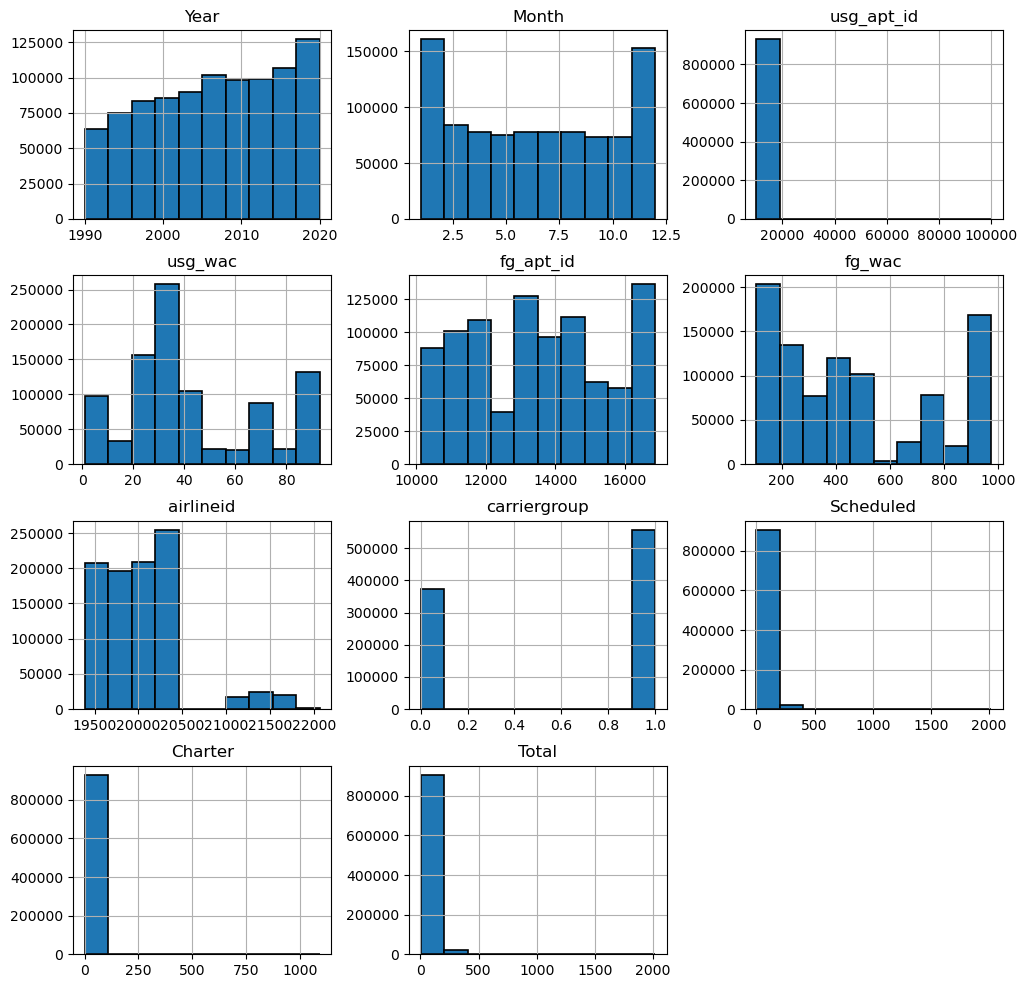

In [20]:
IRD.hist(figsize=(12,12), edgecolor='black', linewidth=1.2)
plt.show()

In [21]:
# We note that some attributes do not have outliers such as Year, Month, usg_wac fg_apt_id,fg_wac, while the rest have outliers

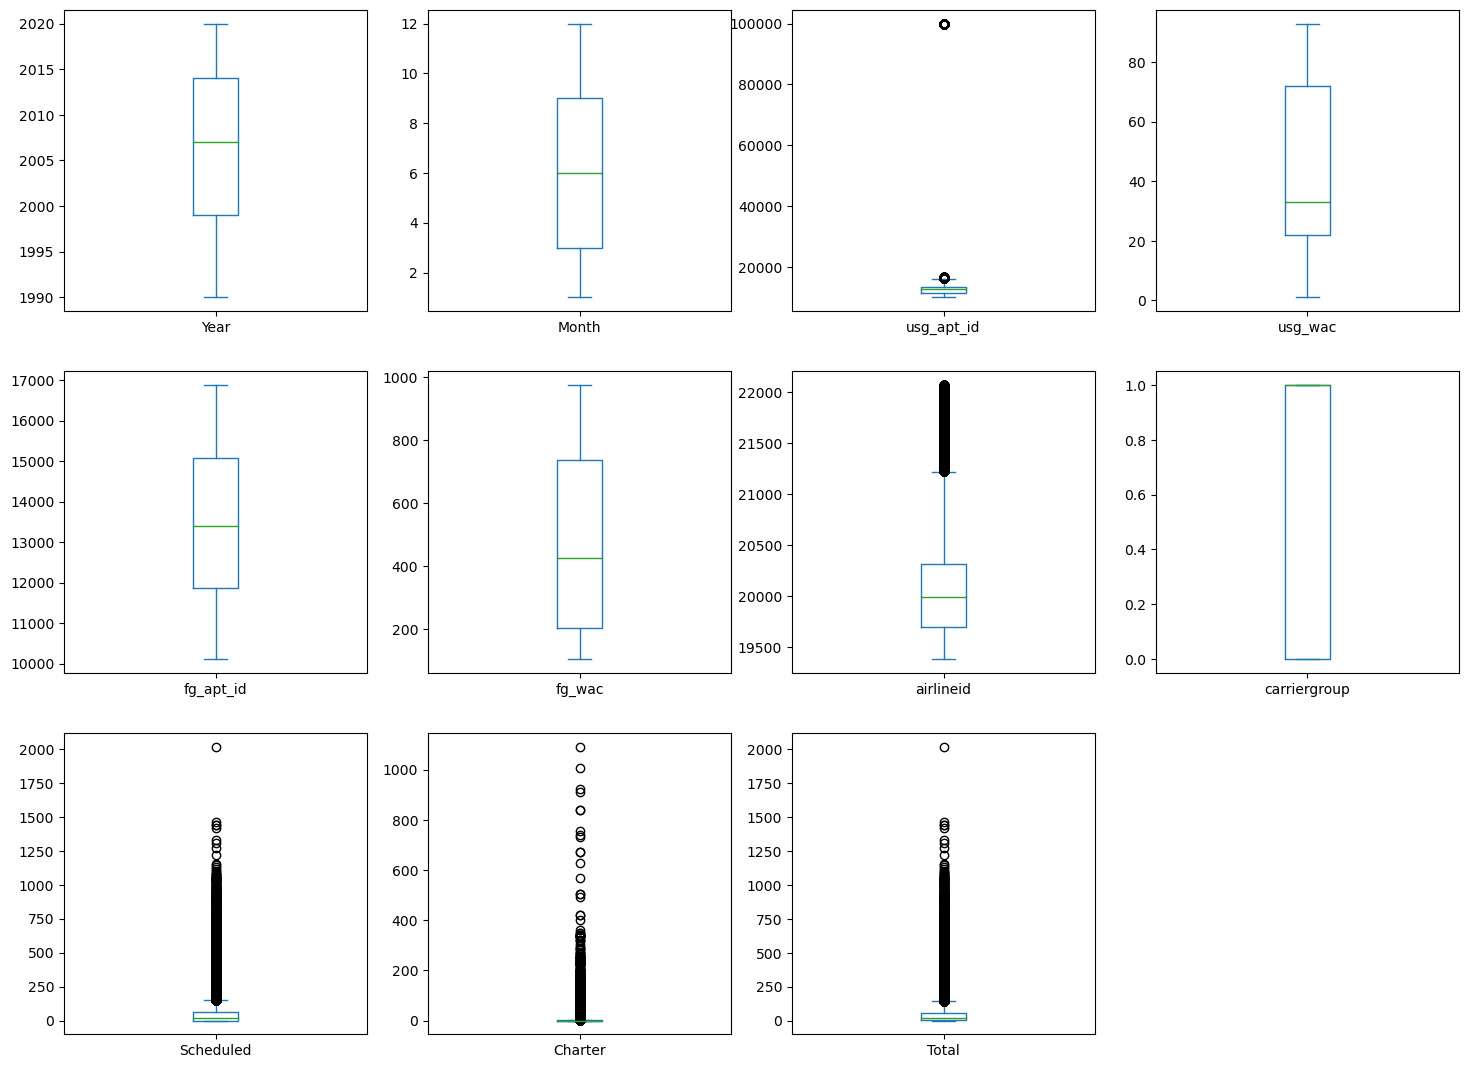

In [22]:
IRD.plot(kind='box',figsize=(18,18),sharex=False,sharey=False,subplots=True, layout=(4,4));

In [23]:
# To try to determine the relationship of features to each other, we note that the strongest relationship was between Scheduled, Total about 0.99, then fg_apt_id,fg_wac about 0.51

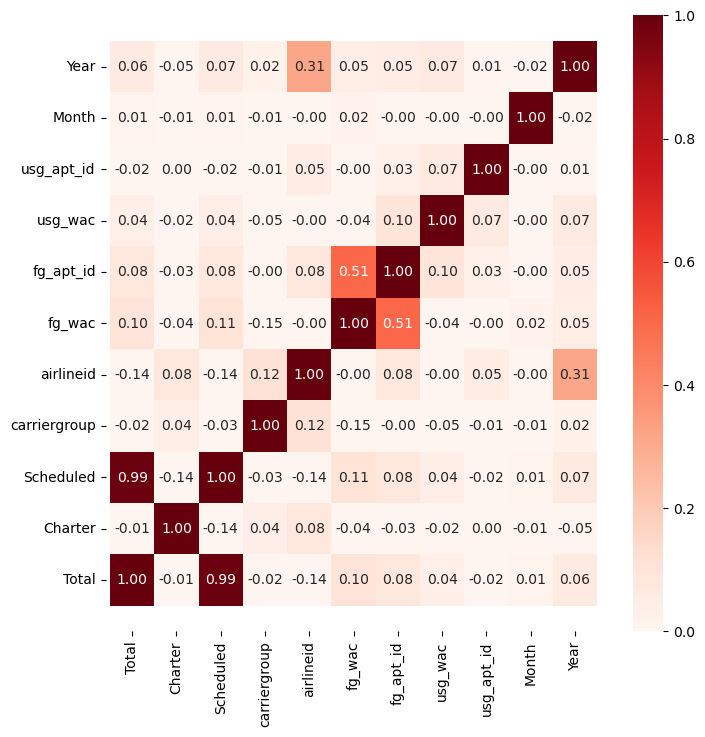

In [24]:
plt.figure(figsize=(8,8))
plt.grid(False)
plt.xticks( range( IRD.shape[ 1 ] ), IRD.columns[ 0: ], rotation=0 )
plt.yticks( range( IRD.shape[ 1 ] ), IRD.columns[ 0: ], rotation=0 )
ax = sns.heatmap( IRD.corr(), cbar=True, annot=True, square=False, fmt='.2f', cmap=plt.cm.Reds, robust=False, vmin=0 )
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_xlim(bottom + 0.1, top - 0.1)
plt.show()

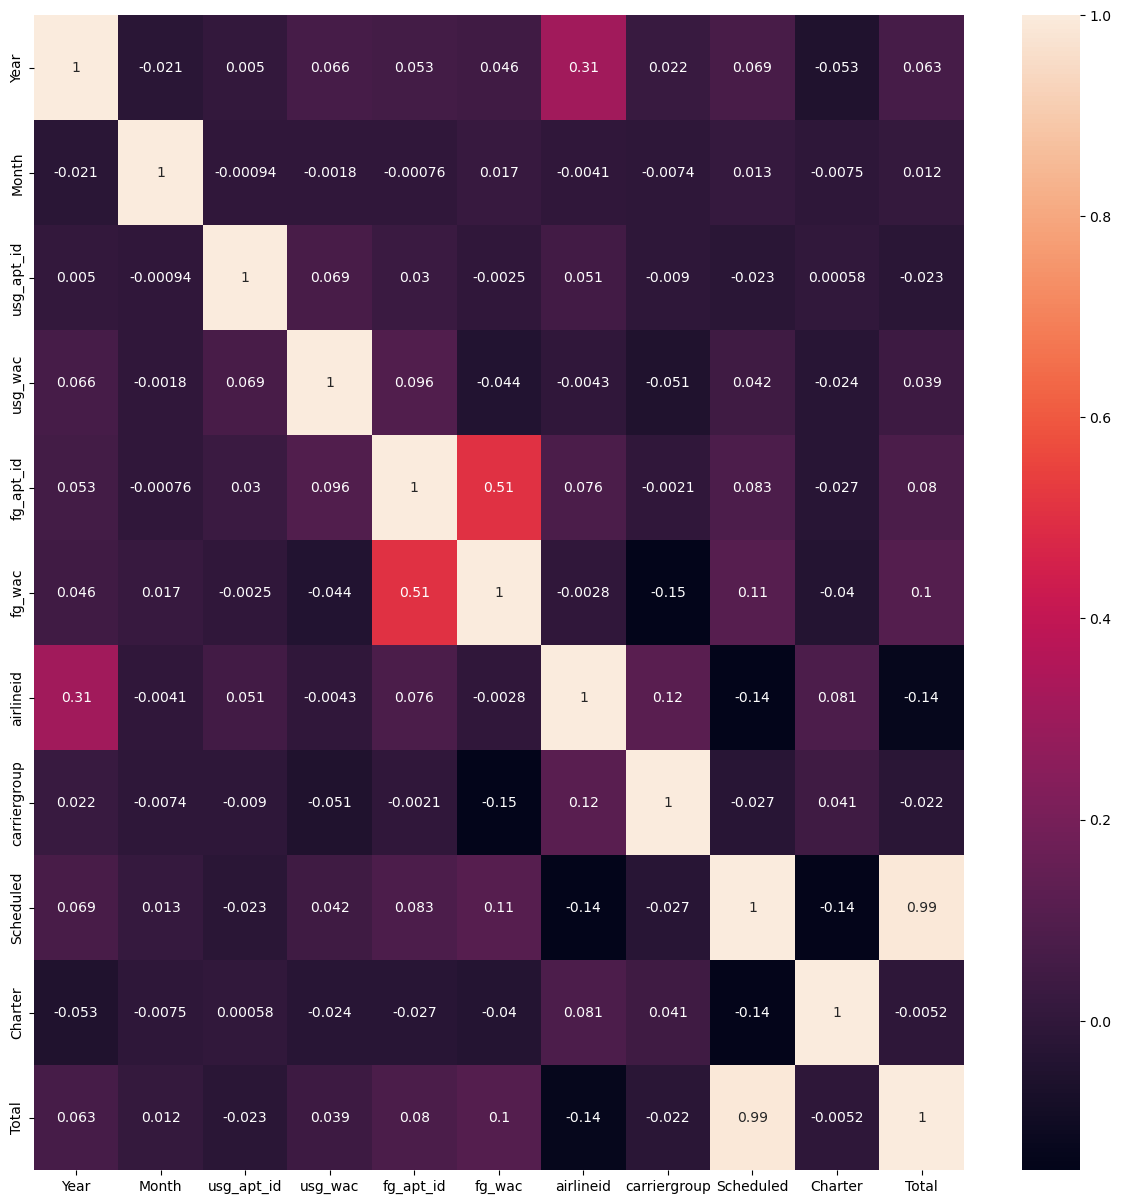

In [25]:
plt.figure(figsize=(15,15))
sns.heatmap(IRD.corr() , annot = True);

In [26]:
# We note that most of the flights were operated by domestic airlines

In [27]:
IRD['carriergroup'] = IRD['carriergroup'].map( {0:'foreign', 1:'local'} ).astype(str)

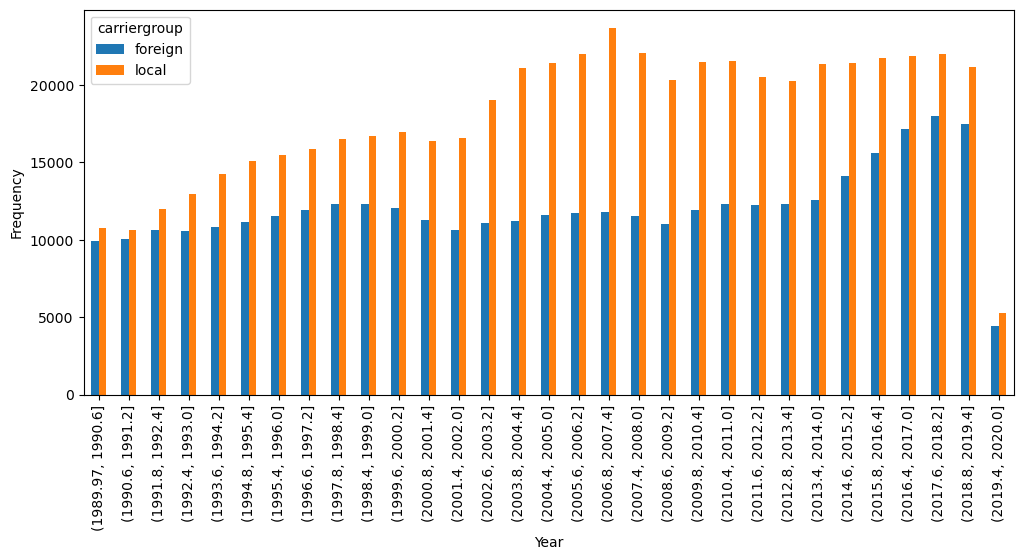

In [28]:
pd.crosstab( pd.cut(IRD.Year,bins=50),IRD.carriergroup).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

In [29]:
# Throughout the months of the year, there are busiest flights, but most of them are between February and March at the beginning of each year.

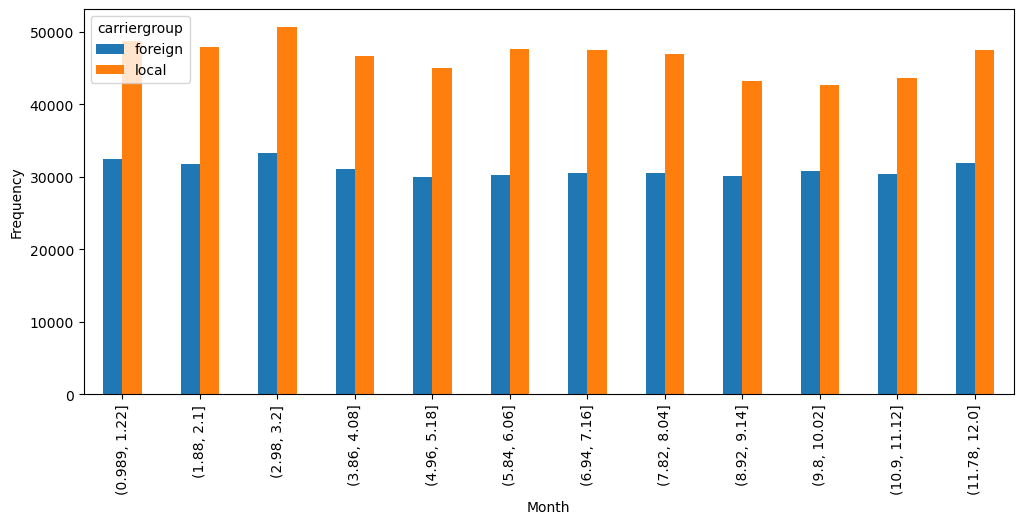

In [30]:
pd.crosstab( pd.cut(IRD.Month,bins=50),IRD.carriergroup).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

In [31]:
# In American airports, the busiest gates were domestic and foreign airlines between 12709 and 16309. The least crowded gates are 99099 to 99999

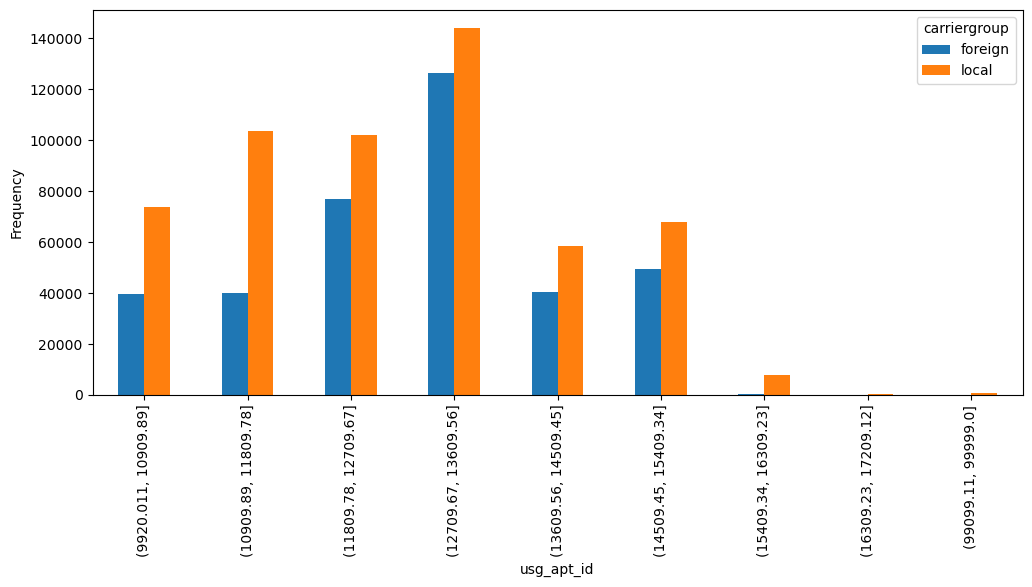

In [32]:
pd.crosstab( pd.cut(IRD.usg_apt_id,bins=100),IRD.carriergroup).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

In [33]:
# In foreign airports, the busiest gates were domestic and foreign airlines between 16096 and 16340. The least crowded gates are 16619 to 16881

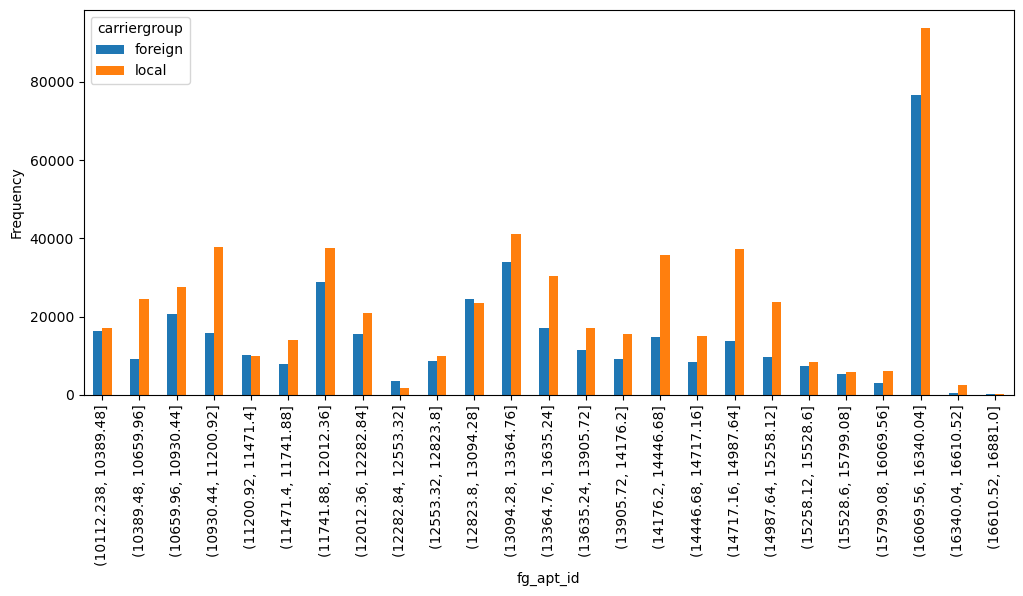

In [34]:
pd.crosstab( pd.cut(IRD.fg_apt_id,bins=25),IRD.carriergroup).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

In [35]:
# It was the busiest flight in 2006 and decreased significantly in 2020

C:\Users\TOSHIBA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='count'>

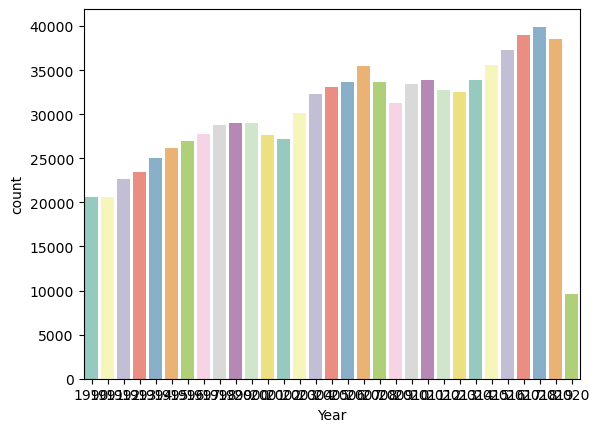

In [36]:
sns.countplot(IRD['Year'], palette='Set3')

## Data processing

In [37]:
# Null value

In [38]:
IRD.isnull().sum()

data_dte           0
Year               0
Month              0
usg_apt_id         0
usg_apt            0
usg_wac            0
fg_apt_id          0
fg_apt             0
fg_wac             0
airlineid          0
carrier         3055
carriergroup       0
type               0
Scheduled          0
Charter            0
Total              0
dtype: int64

In [39]:
## Fill Null value
most_freq = IRD['carrier'].mode().iloc[0]
IRD['carrier'].fillna(most_freq, inplace=True)

In [40]:
IRD.isnull().sum()

data_dte        0
Year            0
Month           0
usg_apt_id      0
usg_apt         0
usg_wac         0
fg_apt_id       0
fg_apt          0
fg_wac          0
airlineid       0
carrier         0
carriergroup    0
type            0
Scheduled       0
Charter         0
Total           0
dtype: int64

In [41]:
# LabelEncoder

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = IRD.columns.tolist()
for column in cols:
    if IRD[column].dtype == 'object':
        IRD[column] = le.fit_transform(IRD[column])


In [43]:
# Transformation data into categories

array([<AxesSubplot:ylabel='carriergroup'>], dtype=object)

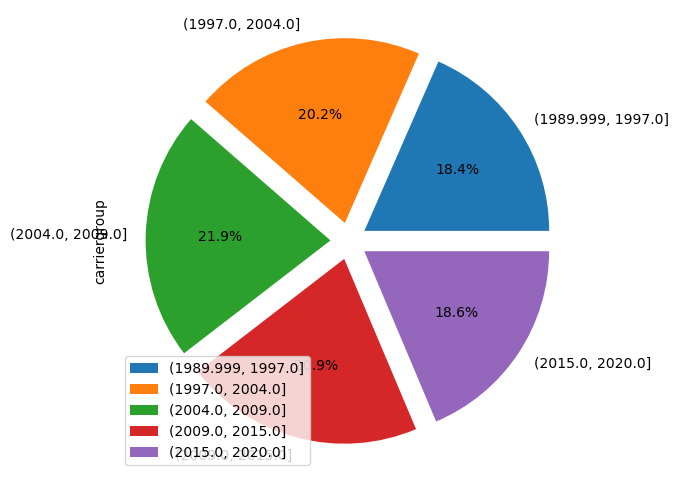

In [44]:
IRD['Categorical_Year'] = pd.qcut(IRD['Year'], 5)
IRD[['Categorical_Year', 'carriergroup']].groupby(['Categorical_Year']).mean().plot.pie(explode=[0.1,0.1,0.1,0.1,0.1]
                                                                     ,autopct='%1.1f%%',figsize=(8,6), subplots=True)

In [45]:
IRD.loc[ IRD['Year'] <= 1997.0, 'Year'] = 0
IRD.loc[(IRD['Year'] > 1997.0) & (IRD['Year'] <= 2004.0), 'Year'] = 1
IRD.loc[(IRD['Year'] > 2004.0) & (IRD['Year'] <= 2009.0), 'Year']   = 2
IRD.loc[(IRD['Year'] > 2009.0) & (IRD['Year'] <= 2015.0), 'Year']   = 3
IRD.loc[(IRD['Year'] > 2015.0) & (IRD['Year'] <= 2020.0), 'Year']   = 4
IRD.loc[(IRD['Year'] > 2020.0, 'Year')] = 5

IRD['Year'] = IRD['Year'].astype(int)

array([<AxesSubplot:ylabel='carriergroup'>], dtype=object)

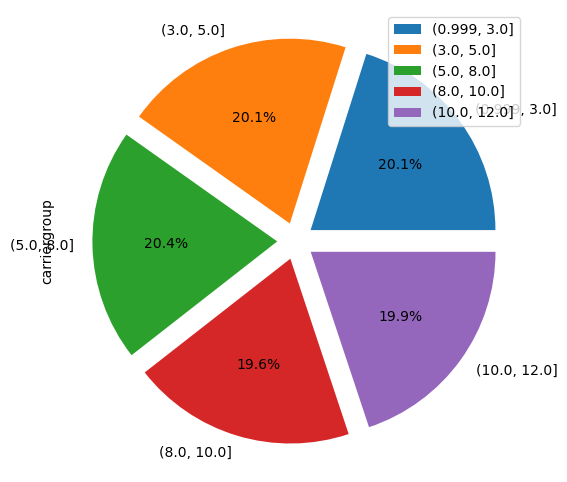

In [46]:
IRD['Categorical_Month'] = pd.qcut(IRD['Month'], 5)
IRD[['Categorical_Month', 'carriergroup']].groupby(['Categorical_Month']).mean().plot.pie(explode=[0.1,0.1,0.1,0.1,0.1]
                                                                     ,autopct='%1.1f%%',figsize=(8,6), subplots=True)

In [47]:
IRD.loc[ IRD['Month'] <= 3.0, 'Month'] = 0
IRD.loc[(IRD['Month'] > 3.0) & (IRD['Month'] <= 5.0), 'Month'] = 1
IRD.loc[(IRD['Month'] > 5.0) & (IRD['Month'] <= 8.0), 'Month']   = 2
IRD.loc[(IRD['Month'] > 8.0) & (IRD['Month'] <= 10.0), 'Month']   = 3
IRD.loc[(IRD['Month'] > 10.0) & (IRD['Month'] <= 12.0), 'Month']   = 4
IRD.loc[(IRD['Month'] > 12.0, 'Month')] = 5

IRD['Month'] = IRD['Month'].astype(int)

array([<AxesSubplot:ylabel='carriergroup'>], dtype=object)

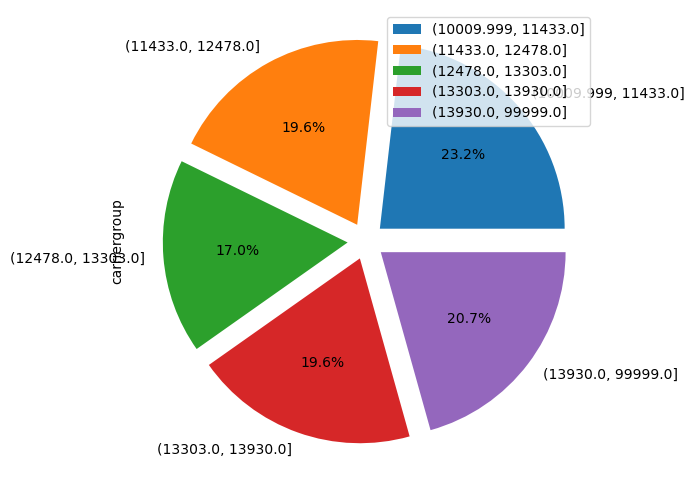

In [48]:
IRD['Categorical_usg_apt_id'] = pd.qcut(IRD['usg_apt_id'], 5)
IRD[['Categorical_usg_apt_id', 'carriergroup']].groupby(['Categorical_usg_apt_id']).mean().plot.pie(explode=[0.1,0.1,0.1,0.1,0.1]
                                                                     ,autopct='%1.1f%%',figsize=(8,6), subplots=True)

In [49]:
IRD.loc[ IRD['usg_apt_id'] <= 11433.0, 'usg_apt_id'] = 0
IRD.loc[(IRD['usg_apt_id'] > 11433.0) & (IRD['usg_apt_id'] <= 12478.0), 'usg_apt_id'] = 1
IRD.loc[(IRD['usg_apt_id'] > 12478.0) & (IRD['usg_apt_id'] <= 13303.0), 'usg_apt_id']   = 2
IRD.loc[(IRD['usg_apt_id'] > 13303.0) & (IRD['usg_apt_id'] <= 13930.0), 'usg_apt_id']   = 3
IRD.loc[(IRD['usg_apt_id'] > 13930.0) & (IRD['usg_apt_id'] <= 99999.0), 'usg_apt_id']   = 4
IRD.loc[(IRD['usg_apt_id'] > 99999.0, 'usg_apt_id')] = 5


array([<AxesSubplot:ylabel='carriergroup'>], dtype=object)

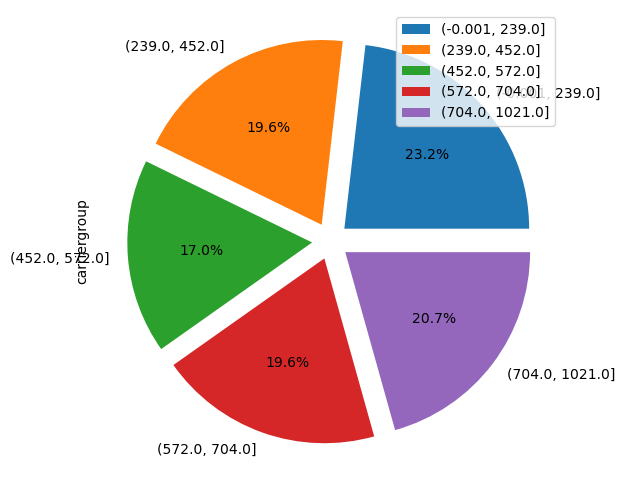

In [50]:
IRD['Categorical_usg_apt'] = pd.qcut(IRD['usg_apt'], 5)
IRD[['Categorical_usg_apt', 'carriergroup']].groupby(['Categorical_usg_apt']).mean().plot.pie(explode=[0.1,0.1,0.1,0.1,0.1]
                                                                     ,autopct='%1.1f%%',figsize=(8,6), subplots=True)

In [51]:
IRD.loc[ IRD['usg_apt'] <= 239.0, 'usg_apt'] = 0
IRD.loc[(IRD['usg_apt'] > 239.0) & (IRD['usg_apt'] <= 452.0), 'usg_apt'] = 1
IRD.loc[(IRD['usg_apt'] > 452.0) & (IRD['usg_apt'] <= 572.0), 'usg_apt']   = 2
IRD.loc[(IRD['usg_apt'] > 572.0) & (IRD['usg_apt'] <= 704.0), 'usg_apt']   = 3
IRD.loc[(IRD['usg_apt'] > 704.0) & (IRD['usg_apt'] <= 1021.0), 'usg_apt']   = 4
IRD.loc[(IRD['usg_apt'] > 1021.0, 'usg_apt')] = 5


array([<AxesSubplot:ylabel='carriergroup'>], dtype=object)

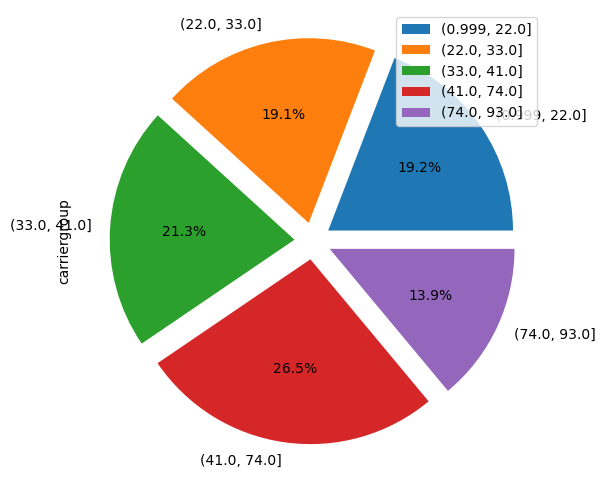

In [52]:
IRD['Categorical_usg_wac'] = pd.qcut(IRD['usg_wac'], 5)
IRD[['Categorical_usg_wac', 'carriergroup']].groupby(['Categorical_usg_wac']).mean().plot.pie(explode=[0.1,0.1,0.1,0.1,0.1]
                                                                     ,autopct='%1.1f%%',figsize=(8,6), subplots=True)

In [53]:
IRD.loc[ IRD['usg_wac'] <= 22.0, 'usg_wac'] = 0
IRD.loc[(IRD['usg_wac'] > 22.0) & (IRD['usg_wac'] <= 33.0), 'usg_wac'] = 1
IRD.loc[(IRD['usg_wac'] > 33.0) & (IRD['usg_wac'] <= 41.0), 'usg_wac']   = 2
IRD.loc[(IRD['usg_wac'] > 41.0) & (IRD['usg_wac'] <= 74.0), 'usg_wac']   = 3
IRD.loc[(IRD['usg_wac'] > 74.0) & (IRD['usg_wac'] <= 93.0), 'usg_wac']   = 4
IRD.loc[(IRD['usg_wac'] > 93.0, 'usg_wac')] = 5


array([<AxesSubplot:ylabel='carriergroup'>], dtype=object)

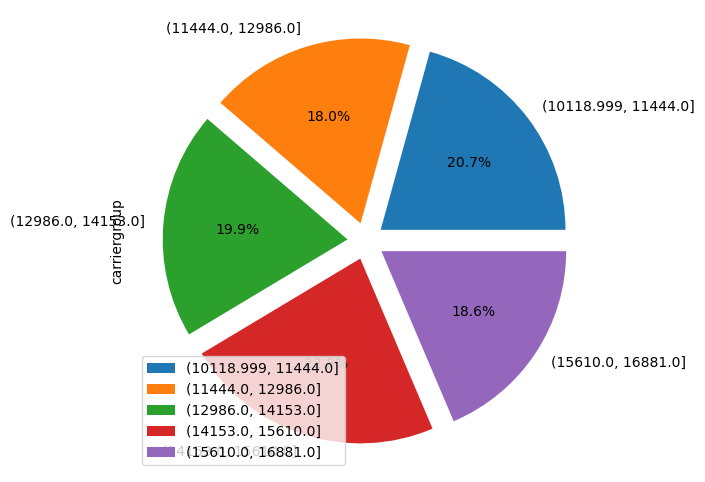

In [54]:
IRD['Categorical_fg_apt_id'] = pd.qcut(IRD['fg_apt_id'], 5)
IRD[['Categorical_fg_apt_id', 'carriergroup']].groupby(['Categorical_fg_apt_id']).mean().plot.pie(explode=[0.1,0.1,0.1,0.1,0.1]
                                                                     ,autopct='%1.1f%%',figsize=(8,6), subplots=True)

In [55]:
IRD.loc[ IRD['fg_apt_id'] <= 11444.0, 'fg_apt_id'] = 0
IRD.loc[(IRD['fg_apt_id'] > 11444.0) & (IRD['fg_apt_id'] <= 12986.0), 'fg_apt_id'] = 1
IRD.loc[(IRD['fg_apt_id'] > 12986.0) & (IRD['fg_apt_id'] <= 14153.0), 'fg_apt_id']   = 2
IRD.loc[(IRD['fg_apt_id'] > 14153.0) & (IRD['fg_apt_id'] <= 15610.0), 'fg_apt_id']   = 3
IRD.loc[(IRD['fg_apt_id'] > 15610.0) & (IRD['fg_apt_id'] <= 16881.0), 'fg_apt_id']   = 4
IRD.loc[(IRD['fg_apt_id'] > 16881.0, 'fg_apt_id')] = 5


array([<AxesSubplot:ylabel='carriergroup'>], dtype=object)

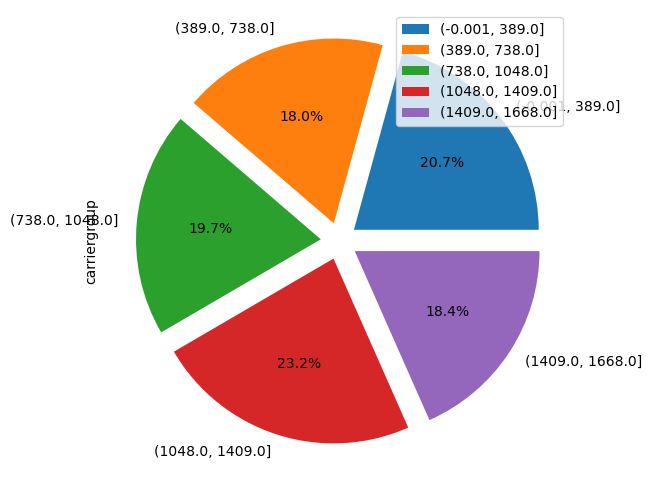

In [56]:
IRD['Categorical_fg_apt'] = pd.qcut(IRD['fg_apt'], 5)
IRD[['Categorical_fg_apt', 'carriergroup']].groupby(['Categorical_fg_apt']).mean().plot.pie(explode=[0.1,0.1,0.1,0.1,0.1]
                                                                     ,autopct='%1.1f%%',figsize=(8,6), subplots=True)

In [57]:
IRD.loc[ IRD['fg_apt'] <= 389.0, 'fg_apt'] = 0
IRD.loc[(IRD['fg_apt'] > 389.0) & (IRD['fg_apt'] <= 738.0), 'fg_apt'] = 1
IRD.loc[(IRD['fg_apt'] > 738.0) & (IRD['fg_apt'] <= 1048.0), 'fg_apt']   = 2
IRD.loc[(IRD['fg_apt'] > 1048.0) & (IRD['fg_apt'] <= 1409.0), 'fg_apt']   = 3
IRD.loc[(IRD['fg_apt'] > 1409.0) & (IRD['fg_apt'] <= 1668.0), 'fg_apt']   = 4
IRD.loc[(IRD['fg_apt'] > 1668.0, 'fg_apt')] = 5


array([<AxesSubplot:ylabel='carriergroup'>], dtype=object)

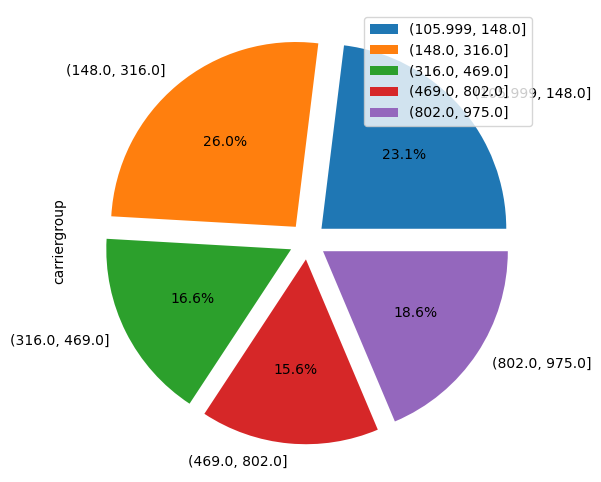

In [58]:
IRD['Categorical_fg_wac'] = pd.qcut(IRD['fg_wac'], 5)
IRD[['Categorical_fg_wac', 'carriergroup']].groupby(['Categorical_fg_wac']).mean().plot.pie(explode=[0.1,0.1,0.1,0.1,0.1]
                                                                     ,autopct='%1.1f%%',figsize=(8,6), subplots=True)

In [59]:
IRD.loc[ IRD['fg_wac'] <= 148.0, 'fg_wac'] = 0
IRD.loc[(IRD['fg_wac'] > 148.0) & (IRD['fg_wac'] <= 316.0), 'fg_wac'] = 1
IRD.loc[(IRD['fg_wac'] > 316.0) & (IRD['fg_wac'] <= 469.0), 'fg_wac']   = 2
IRD.loc[(IRD['fg_wac'] > 469.0) & (IRD['fg_wac'] <= 802.0), 'fg_wac']   = 3
IRD.loc[(IRD['fg_wac'] > 802.0) & (IRD['fg_wac'] <= 975.0), 'fg_wac']   = 4
IRD.loc[(IRD['fg_wac'] > 975.0, 'fg_wac')] = 5


array([<AxesSubplot:ylabel='carriergroup'>], dtype=object)

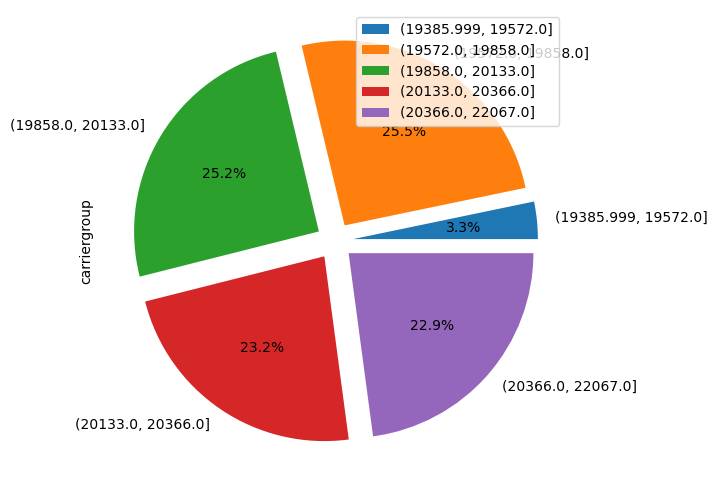

In [60]:
IRD['Categorical_airlineid'] = pd.qcut(IRD['airlineid'], 5)
IRD[['Categorical_airlineid', 'carriergroup']].groupby(['Categorical_airlineid']).mean().plot.pie(explode=[0.1,0.1,0.1,0.1,0.1]
                                                                     ,autopct='%1.1f%%',figsize=(8,6), subplots=True)

In [61]:
IRD.loc[ IRD['airlineid'] <= 19572.0, 'airlineid'] = 0
IRD.loc[(IRD['airlineid'] > 19572.0) & (IRD['airlineid'] <= 19858.0), 'airlineid'] = 1
IRD.loc[(IRD['airlineid'] > 19858.0) & (IRD['airlineid'] <= 20133.0), 'airlineid']   = 2
IRD.loc[(IRD['airlineid'] > 20133.0) & (IRD['airlineid'] <= 20366.0), 'airlineid']   = 3
IRD.loc[(IRD['airlineid'] > 20366.0) & (IRD['airlineid'] <= 22067.0), 'airlineid']   = 4
IRD.loc[(IRD['airlineid'] > 22067.0, 'airlineid')] = 5


array([<AxesSubplot:ylabel='carriergroup'>], dtype=object)

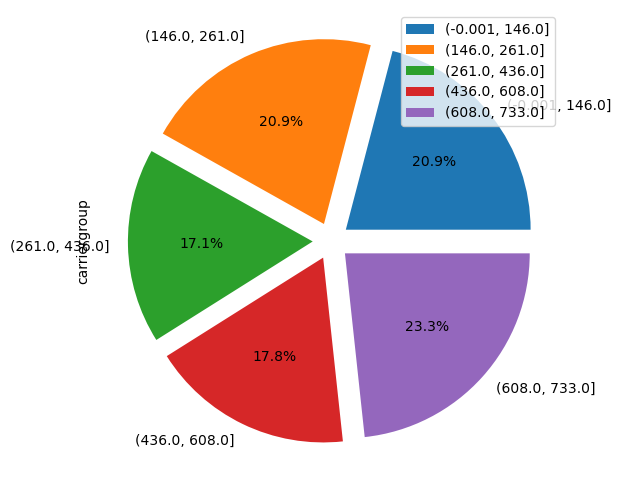

In [62]:
IRD['Categorical_carrier'] = pd.qcut(IRD['carrier'], 5)
IRD[['Categorical_carrier', 'carriergroup']].groupby(['Categorical_carrier']).mean().plot.pie(explode=[0.1,0.1,0.1,0.1,0.1]
                                                                     ,autopct='%1.1f%%',figsize=(8,6), subplots=True)

In [63]:
IRD.loc[ IRD['carrier'] <= 146.0, 'carrier'] = 0
IRD.loc[(IRD['carrier'] > 146.0) & (IRD['carrier'] <= 261.0), 'carrier'] = 1
IRD.loc[(IRD['carrier'] > 261.0) & (IRD['carrier'] <= 436.0), 'carrier']   = 2
IRD.loc[(IRD['carrier'] > 436.0) & (IRD['carrier'] <= 698.0), 'carrier']   = 3
IRD.loc[(IRD['carrier'] > 608.0) & (IRD['carrier'] <= 733.0), 'carrier']   = 4
IRD.loc[(IRD['carrier'] > 733.0, 'carrier')] = 5


array([<AxesSubplot:ylabel='carriergroup'>], dtype=object)

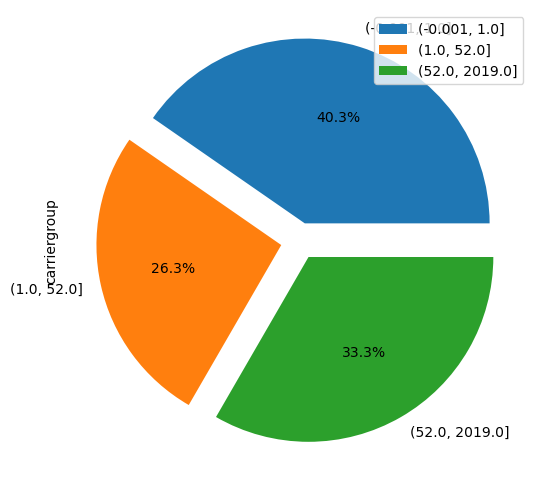

In [64]:
IRD['Categorical_Scheduled'] = pd.qcut(IRD['Scheduled'], 3)
IRD[['Categorical_Scheduled', 'carriergroup']].groupby(['Categorical_Scheduled']).mean().plot.pie(explode=[0.1,0.1,0.1]
                                                                     ,autopct='%1.1f%%',figsize=(8,6), subplots=True)

In [65]:
IRD.loc[ IRD['Scheduled'] <= 1.0, 'Scheduled'] = 0
IRD.loc[(IRD['Scheduled'] > 1.0) & (IRD['Scheduled'] <= 52.0), 'Scheduled'] = 1
IRD.loc[(IRD['Scheduled'] > 52.0) & (IRD['Scheduled'] <= 2019.0), 'Scheduled']   = 2
IRD.loc[(IRD['Scheduled'] > 2019.0, 'Scheduled')] = 3


array([<AxesSubplot:ylabel='carriergroup'>], dtype=object)

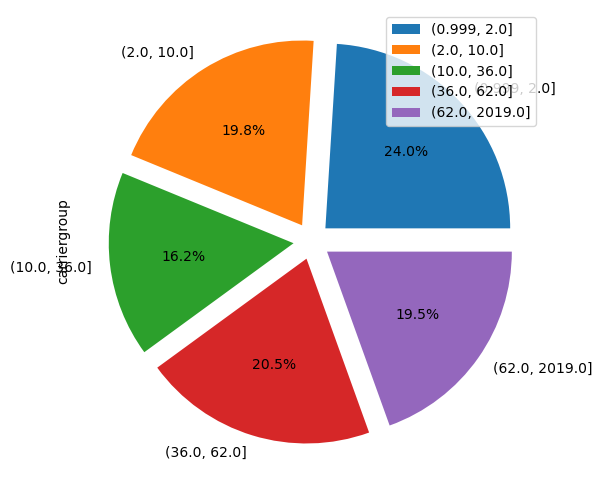

In [66]:
IRD['Categorical_Total'] = pd.qcut(IRD['Total'], 5)
IRD[['Categorical_Total', 'carriergroup']].groupby(['Categorical_Total']).mean().plot.pie(explode=[0.1,0.1,0.1,0.1,0.1]
                                                                     ,autopct='%1.1f%%',figsize=(8,6), subplots=True)

In [67]:
IRD.loc[ IRD['Total'] <= 2.0, 'Total'] = 0
IRD.loc[(IRD['Total'] > 2.0) & (IRD['Total'] <= 10.0), 'Total'] = 1
IRD.loc[(IRD['Total'] > 10.0) & (IRD['Total'] <= 36.0), 'Total']   = 2
IRD.loc[(IRD['Total'] > 36.0) & (IRD['Total'] <= 62.0), 'Total']   = 3
IRD.loc[(IRD['Total'] > 62.0) & (IRD['Total'] <= 2019.0), 'Total']   = 4
IRD.loc[(IRD['Total'] > 2019.0, 'Total')] = 5


In [68]:
IRD

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total,Categorical_Year,Categorical_Month,Categorical_usg_apt_id,Categorical_usg_apt,Categorical_usg_wac,Categorical_fg_apt_id,Categorical_fg_apt,Categorical_fg_wac,Categorical_airlineid,Categorical_carrier,Categorical_Scheduled,Categorical_Total
0,139,2,1,1,1,0,2,2,4,3,3,1,0,0,10,1,"(2004.0, 2009.0]","(3.0, 5.0]","(11433.0, 12478.0]","(239.0, 452.0]","(0.999, 22.0]","(12986.0, 14153.0]","(738.0, 1048.0]","(802.0, 975.0]","(20133.0, 20366.0]","(436.0, 608.0]","(-0.001, 1.0]","(2.0, 10.0]"
1,136,1,1,0,0,0,2,2,3,2,0,1,0,0,15,2,"(1997.0, 2004.0]","(3.0, 5.0]","(10009.999, 11433.0]","(-0.001, 239.0]","(0.999, 22.0]","(12986.0, 14153.0]","(738.0, 1048.0]","(469.0, 802.0]","(19858.0, 20133.0]","(-0.001, 146.0]","(-0.001, 1.0]","(10.0, 36.0]"
2,79,2,0,0,0,0,1,1,2,4,2,1,0,0,1,0,"(2004.0, 2009.0]","(0.999, 3.0]","(10009.999, 11433.0]","(-0.001, 239.0]","(0.999, 22.0]","(11444.0, 12986.0]","(389.0, 738.0]","(316.0, 469.0]","(20366.0, 22067.0]","(261.0, 436.0]","(-0.001, 1.0]","(0.999, 2.0]"
3,347,1,4,0,0,3,4,4,4,3,1,1,0,0,1,0,"(1997.0, 2004.0]","(10.0, 12.0]","(10009.999, 11433.0]","(-0.001, 239.0]","(41.0, 74.0]","(15610.0, 16881.0]","(1409.0, 1668.0]","(802.0, 975.0]","(20133.0, 20366.0]","(146.0, 261.0]","(-0.001, 1.0]","(0.999, 2.0]"
4,142,2,1,2,2,1,0,0,1,4,0,0,0,0,20,2,"(2004.0, 2009.0]","(3.0, 5.0]","(12478.0, 13303.0]","(452.0, 572.0]","(22.0, 33.0]","(10118.999, 11444.0]","(-0.001, 389.0]","(148.0, 316.0]","(20366.0, 22067.0]","(-0.001, 146.0]","(-0.001, 1.0]","(10.0, 36.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930803,193,1,2,2,2,1,2,2,1,4,3,1,0,2,0,4,"(1997.0, 2004.0]","(5.0, 8.0]","(12478.0, 13303.0]","(452.0, 572.0]","(22.0, 33.0]","(12986.0, 14153.0]","(738.0, 1048.0]","(148.0, 316.0]","(20366.0, 22067.0]","(436.0, 608.0]","(52.0, 2019.0]","(62.0, 2019.0]"
930804,122,4,1,2,2,1,3,3,1,1,1,0,0,2,0,4,"(2015.0, 2020.0]","(3.0, 5.0]","(12478.0, 13303.0]","(452.0, 572.0]","(22.0, 33.0]","(14153.0, 15610.0]","(1048.0, 1409.0]","(148.0, 316.0]","(19572.0, 19858.0]","(146.0, 261.0]","(52.0, 2019.0]","(62.0, 2019.0]"
930805,223,1,2,2,2,1,2,2,1,4,3,1,0,2,0,4,"(1997.0, 2004.0]","(5.0, 8.0]","(12478.0, 13303.0]","(452.0, 572.0]","(22.0, 33.0]","(12986.0, 14153.0]","(738.0, 1048.0]","(148.0, 316.0]","(20366.0, 22067.0]","(436.0, 608.0]","(52.0, 2019.0]","(62.0, 2019.0]"
930806,257,1,3,1,1,3,4,4,0,0,0,0,0,2,0,4,"(1997.0, 2004.0]","(8.0, 10.0]","(11433.0, 12478.0]","(239.0, 452.0]","(41.0, 74.0]","(15610.0, 16881.0]","(1409.0, 1668.0]","(105.999, 148.0]","(19385.999, 19572.0]","(-0.001, 146.0]","(52.0, 2019.0]","(62.0, 2019.0]"


In [69]:
IRD=IRD.drop(["data_dte","Charter","Categorical_Year","Categorical_Month","Categorical_usg_apt_id","Categorical_usg_apt","Categorical_usg_wac",
              "Categorical_fg_apt_id","Categorical_fg_apt","Categorical_fg_wac","Categorical_airlineid","Categorical_carrier",
              "Categorical_Scheduled","Categorical_Total"],axis=1)

In [70]:
IRD

,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Total
0,2,1,1,1,0,2,2,4,3,3,1,0,0,1
1,1,1,0,0,0,2,2,3,2,0,1,0,0,2
2,2,0,0,0,0,1,1,2,4,2,1,0,0,0
3,1,4,0,0,3,4,4,4,3,1,1,0,0,0
4,2,1,2,2,1,0,0,1,4,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930803,1,2,2,2,1,2,2,1,4,3,1,0,2,4
930804,4,1,2,2,1,3,3,1,1,1,0,0,2,4
930805,1,2,2,2,1,2,2,1,4,3,1,0,2,4
930806,1,3,1,1,3,4,4,0,0,0,0,0,2,4
